# Google Playstore Analysis

Google Play store is a digital distribution service operated and developed by Google. It serves as the official app store on the Android operating system. The aim of this project is to analyse the apps which are available on Google play store. 
The dataset is downloded from kaggle.It consists of apps along with their category, reviews, ratings and many more things.
In this project we analyse the performance of the apps using numpy, pandas, matplotlib and seaborn, and find out many interesting things.


In [1]:
project_name = "Google Playstore Analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "aashigupta118/google-playstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aashigupta118/google-playstore-analysis


'https://jovian.ml/aashigupta118/google-playstore-analysis'

# Import the libraries

To perform analysis on data, we have to import certain libraries, which are as follows-

In [5]:
import pandas as pd               #used for reading the dataset
import numpy as np                #used for numeric calculations
import matplotlib.pyplot as plt   #matplotlib and seaborn, both are used for visualization
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


## Reading the data

It is important to understand the data before analysis, like finding how many rows and columns is present, the type of the columns etc. By this we came to know about insights of the data.

In [6]:
#Read the data using pandas with an build in function "read_csv" followed by the name or path of the file.
dataset=pd.read_csv("googleplaystore.csv")
#Below command results in 1st five rows of the data
dataset.head()                          

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#Pd.read_csv stored the data into dataframe, we can check it by using the type function.
type(dataset)

pandas.core.frame.DataFrame

In [8]:
#Shape is used to find the total number of rows and columns
dataset.shape

(10841, 13)

In [9]:
#This command gives all the names of the columns
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
#This command gives the statistical computation of numeric columns
dataset.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Note that by describe() function, we came to know about that the dataset has only one numeric column i.e Rating.

In [11]:
#This command gives the total number of unique values in each column
dataset.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [12]:
#This command gives the basic information of each column related to their type,null values and total number of rows and columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From this we came to know about that the columns- rating, type, content rating, current version and android version has null values.

# Data Preparation and Cleaning

It is an important step before analysis. In this stage, we find how many null values are present, how to remove unwanted data and other things which is needed to be clean.

In [13]:
#This command gives the total null values present in each column.
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
#This command gives the total null values present in dataset.
dataset.isnull().sum().sum()

1487

<AxesSubplot:>

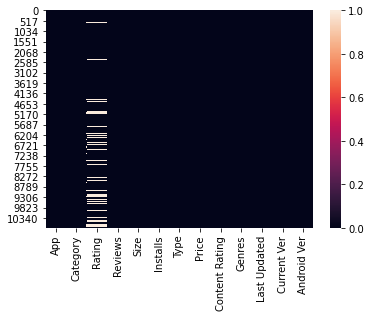

In [15]:
#The visual representation of null values using seaborn.
sns.heatmap(dataset.isnull())

<AxesSubplot:>

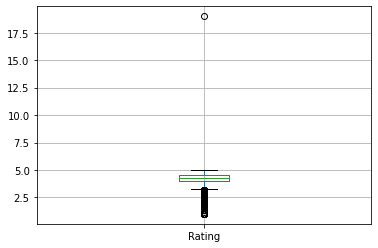

In [16]:
#Boxplot shows the distribution/range of the numerical data.
dataset.boxplot()

But note that here is one point which is not in the expected range, so we have to remove that from the dataset. 
This point is known as outlier.

In [17]:
#Here we find how many points are above the range.
dataset[dataset.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We got only one outlier. Now we have to remove it from dataset.

In [18]:
#To remove a row, drop() is used. Inplace is used to permanentaly remove that row from dataset.
dataset.drop([10472],inplace=True)

In [19]:
#Checking whether that row is now present or not.
dataset[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


See that 10472 row is not present in dataset.By this method, we remove the outlier.

<AxesSubplot:>

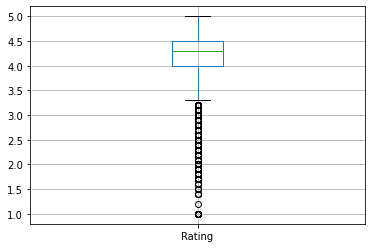

In [20]:
#Again plotting boxplot to completing understand it.
dataset.boxplot()

Now see that all the values are in proper range.

In [21]:
import jovian

In [22]:
jovian.commit(files=["googleplaystore.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aashigupta118/google-playstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aashigupta118/google-playstore-analysis


'https://jovian.ml/aashigupta118/google-playstore-analysis'

# Data Manipulation

It is a part of data cleaning. In this, we fill the null values.

### 1. Numerical column

From info() function, we know that we have only one numeric column i.e Rating. We fill the null values of that column with median of that column.

In [23]:
#Here we define a function median by which we fill the null value with median
def median(col):
    return col.fillna(col.median())

In [24]:
#We fill the null value of rating column with median
dataset.Rating=dataset["Rating"].transform(median)

In [25]:
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Now the rating column has no null values.

### 2. Categorical column

Now we have three columns which have null values. We fill this with mode of that column.

In [26]:
#Here we find what is the mode of particular column i.e which value occurs the most.
print(dataset["Type"].mode())
print(dataset["Current Ver"].mode())
print(dataset["Android Ver"].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [27]:
#We fill the null values by mode which is computed above.
dataset["Type"].fillna(str(dataset['Type'].mode().values[0]),inplace=True)
dataset["Current Ver"].fillna(str(dataset['Current Ver'].mode().values[0]),inplace=True)
dataset["Android Ver"].fillna(str(dataset['Android Ver'].mode().values[0]),inplace=True)

In [28]:
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

By this we have no null values present in the dataset.

Now looking at the dataset, by the column names we understand that price and reviews column also come under the numeric column but in datset they have the type of object i.e string. So we have to convert them into numeric column.

In [29]:
#We take the price column, apply a lambda function to replace $ with an space and then changed it to float type.
dataset["Price"]=dataset["Price"].apply(lambda x:str(x).replace("$","") if "$" in str(x) else str(x))
dataset["Price"]=dataset["Price"].apply(lambda x:float(x))

In [30]:
#We take review column and used an inbuild function pd.to_numeric to convert the column into numeric.
dataset["Reviews"]=pd.to_numeric(dataset["Reviews"],errors="coerce")

In [31]:
#Look at the changes in price and review column.
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
#Again checking the type of columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


See that now we have three numeric columns i.e Rating, Price and Reviews.

In [33]:
jovian.commit(files=["googleplaystore.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aashigupta118/google-playstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aashigupta118/google-playstore-analysis


'https://jovian.ml/aashigupta118/google-playstore-analysis'

## Exploratory Analysis and Visualization

In this step, we put our data into visualization, as to see the clear picture of the dataset. This process is important as it provides more insights from the data.

In [34]:
dataset.describe()

,Rating,Reviews,Price
count,10840.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.027368
std,0.480342,2.927761e+06,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,0.000000
50%,4.300000,2.094000e+03,0.000000
75%,4.500000,5.477550e+04,0.000000
max,5.000000,7.815831e+07,400.000000


After performing data manipulation, now we have three numerical columns.

## 1. Histogram- A histogram is an approximate representation of the distribution of                                              numerical data. 

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

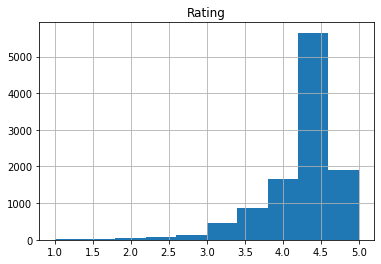

In [36]:
dataset.hist("Rating")

By this visualization, we can say that 4.5 is given to many apps.

## 2. Boxplot- A boxplot, also called a box and whisker plot, is a way to show the spread and centers of a data set.

<AxesSubplot:>

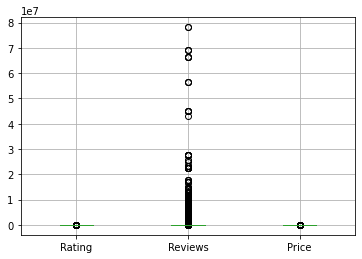

In [37]:
dataset.boxplot()

## 3. Distplot- The  distplot shows the distribution of a univariate set of observations.

<AxesSubplot:xlabel='Rating'>

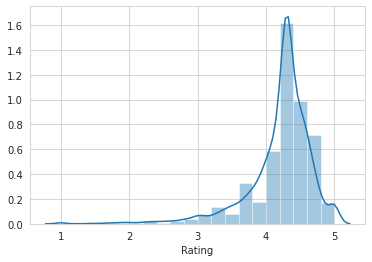

In [38]:
sns.set_style("whitegrid")
sns.distplot(dataset["Rating"],bins=20)

By distplot we came to know that mostly rating are lies between 4-5

## 4. Jointplot- Jointplot allows you to basically match up two distplots for bivariate data. 

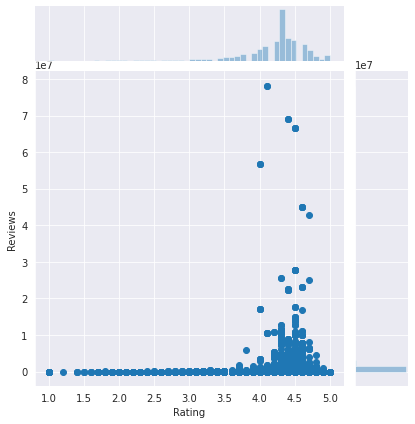

In [39]:
#Here we saw relationship between rating and reviews
sns.set_style("darkgrid")
sns.jointplot(x='Rating',y='Reviews',data=dataset,kind='scatter')

## 5. Pairplot- Pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


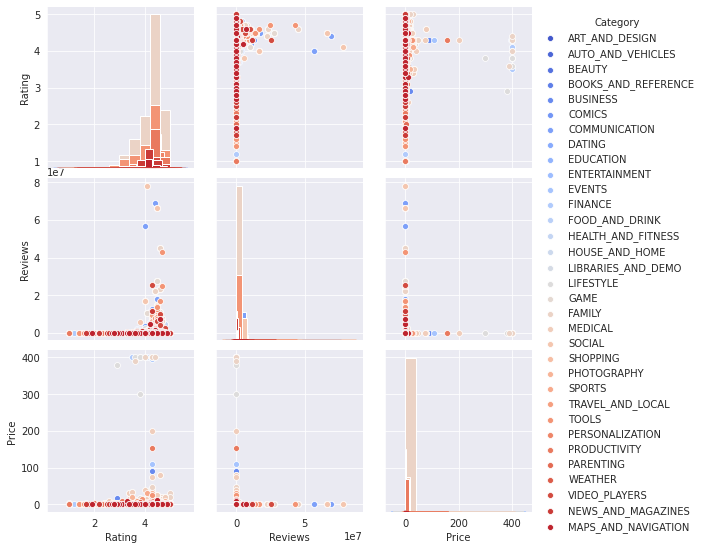

In [40]:
g=sns.pairplot(dataset,hue="Category",palette='coolwarm')
g.map_diag(plt.hist)

## 6. Countplot- This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value.

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

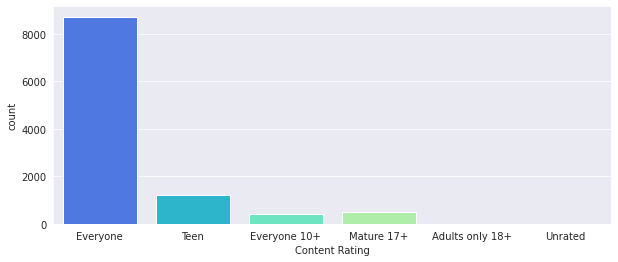

In [41]:
#Here we saw what value in content rating column occurs most.
plt.figure(figsize=(10,4))
sns.countplot("Content Rating", data=dataset,palette='rainbow')

As in this plot, we saw mostly content rating or apps is everyone.

In [42]:
import jovian

In [43]:
jovian.commit(files=["googleplaystore.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aashigupta118/google-playstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aashigupta118/google-playstore-analysis


'https://jovian.ml/aashigupta118/google-playstore-analysis'

## Grouping the apps using category column

In [44]:
grp=dataset.groupby("Category")
grp

In [45]:
d=grp.describe()
d

Rating                                                  \
                      count      mean       std  min    25%   50%  75%  max   
Category                                                                      
ART_AND_DESIGN         65.0  4.355385  0.350014  3.2  4.100  4.40  4.7  5.0   
AUTO_AND_VEHICLES      85.0  4.205882  0.504823  2.1  4.000  4.30  4.5  4.9   
BEAUTY                 53.0  4.283019  0.322094  3.1  4.100  4.30  4.5  4.9   
BOOKS_AND_REFERENCE   231.0  4.335498  0.376880  2.7  4.200  4.30  4.6  5.0   
BUSINESS              460.0  4.182391  0.513537  1.0  4.100  4.30  4.4  5.0   
COMICS                 60.0  4.160000  0.529214  2.8  3.875  4.35  4.5  5.0   
COMMUNICATION         387.0  4.180103  0.395561  1.0  4.100  4.30  4.4  5.0   
DATING                234.0  4.025641  0.588320  1.0  3.900  4.20  4.3  5.0   
EDUCATION             156.0  4.388462  0.251181  3.5  4.200  4.40  4.6  4.9   
ENTERTAINMENT         149.0  4.126174  0.302556  3.0  3.900  4.20  4.3  4.7   
EVENTS                 64.0  4.395313  0.356094  2.9  4.300  4.30  4.6  5.0   
FAMILY               1972.0  4.204564  0.479376  1.0  4.000  4.30  4.5  5.0   
FINANCE               366.0  4.151639  0.605532  1.0  4.000  4.30  4.5  5.0   
FOOD_AND_DRINK        127.0  4.185827  0.509548  1.7  4.050  4.30  4.5  5.0   
GAME                 1144.0  4.286888  0.357795  1.0  4.200  4.30  4.5  5.0   
HEALTH_AND_FITNESS    341.0  4.280059  0.576512  1.4  4.200  4.40  4.6  5.0   
HOUSE_AND_HOME         88.0  4.211364  0.343890  2.8  4.000  4.30  4.5  4.8   
LIBRARIES_AND_DEMO     85.0  4.207059  0.334446  3.1  4.100  4.30  4.4  5.0   
LIFESTYLE             382.0  4.131414  0.633830  1.5  3.900  4.30  4.5  5.0   
MAPS_AND_NAVIGATION   137.0  4.075182  0.499821  1.9  3.900  4.20  4.4  4.9   
MEDICAL               463.0  4.216199  0.578714  1.0  4.200  4.30  4.5  5.0   
NEWS_AND_MAGAZINES    283.0  4.161837  0.491011  1.7  4.000  4.30  4.4  5.0   
PARENTING              60.0  4.300000  0.471924  2.0  4.100  4.35  4.6  5.0   
PERSONALIZATION       392.0  4.328827  0.315921  2.5  4.200  4.30  4.5  5.0   
PHOTOGRAPHY           335.0  4.197910  0.450909  2.0  4.100  4.30  4.5  5.0   
PRODUCTIVITY          424.0  4.226651  0.460519  1.0  4.200  4.30  4.5  5.0   
SHOPPING              260.0  4.263077  0.387176  1.6  4.100  4.30  4.5  5.0   
SOCIAL                295.0  4.261017  0.387920  1.9  4.100  4.30  4.5  5.0   
SPORTS                384.0  4.236458  0.390920  1.5  4.100  4.30  4.4  5.0   
TOOLS                 843.0  4.080071  0.581101  1.0  3.900  4.30  4.4  5.0   
TRAVEL_AND_LOCAL      258.0  4.132946  0.476408  2.2  4.000  4.30  4.4  5.0   
VIDEO_PLAYERS         175.0  4.084000  0.530967  1.8  3.800  4.30  4.4  4.9   
WEATHER                82.0  4.248780  0.317103  3.3  4.200  4.30  4.5  4.8   

                    Reviews                ...                          Price  \
                      count          mean  ...        75%         max   count   
Category                                   ...                                  
ART_AND_DESIGN         65.0  2.637600e+04  ...    5754.00    295237.0    65.0   
AUTO_AND_VEHICLES      85.0  1.369019e+04  ...    4140.00    271920.0    85.0   
BEAUTY                 53.0  7.476226e+03  ...    3595.00    113715.0    53.0   
BOOKS_AND_REFERENCE   231.0  9.506090e+04  ...   19085.00   2915189.0   231.0   
BUSINESS              460.0  3.033598e+04  ...    3810.75   1279800.0   460.0   
COMICS                 60.0  5.638793e+04  ...   19748.25   1013944.0    60.0   
COMMUNICATION         387.0  2.107138e+06  ...  447478.50  69119316.0   387.0   
DATING                234.0  3.115931e+04  ...   11762.75    516917.0   234.0   
EDUCATION             156.0  2.538191e+05  ...  144111.25   6290507.0   156.0   
ENTERTAINMENT         149.0  3.971688e+05  ...  288150.00   7165362.0   149.0   
EVENTS                 64.0  2.515906e+03  ...     874.50     40113.0    64.0   
FAMILY               1972.0  2.080255e+05 

## Which category has maximum number of apps?

In [46]:
#Total number of apps in each category
a=d["Rating"]["count"]
a

Category
ART_AND_DESIGN           65.0
AUTO_AND_VEHICLES        85.0
BEAUTY                   53.0
BOOKS_AND_REFERENCE     231.0
BUSINESS                460.0
COMICS                   60.0
COMMUNICATION           387.0
DATING                  234.0
EDUCATION               156.0
ENTERTAINMENT           149.0
EVENTS                   64.0
FAMILY                 1972.0
FINANCE                 366.0
FOOD_AND_DRINK          127.0
GAME                   1144.0
HEALTH_AND_FITNESS      341.0
HOUSE_AND_HOME           88.0
LIBRARIES_AND_DEMO       85.0
LIFESTYLE               382.0
MAPS_AND_NAVIGATION     137.0
MEDICAL                 463.0
NEWS_AND_MAGAZINES      283.0
PARENTING                60.0
PERSONALIZATION         392.0
PHOTOGRAPHY             335.0
PRODUCTIVITY            424.0
SHOPPING                260.0
SOCIAL                  295.0
SPORTS                  384.0
TOOLS                   843.0
TRAVEL_AND_LOCAL        258.0
VIDEO_PLAYERS           175.0
WEATHER                  82.0
N

In [47]:
a.max()

1972.0

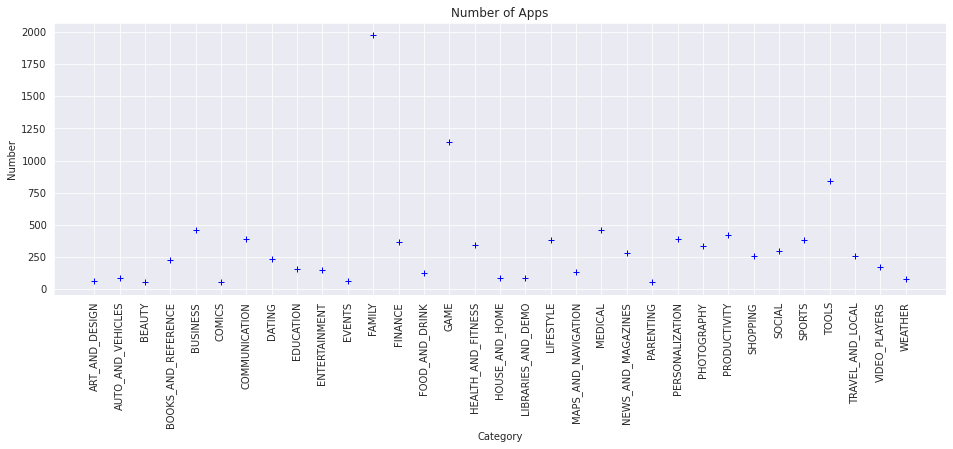

In [48]:
#Plotting the result
plt.figure(figsize=(16,5))
plt.plot(a,"r+",color="b")
plt.xticks(rotation=90)
plt.title("Number of Apps")
plt.xlabel("Category")
plt.ylabel("Number")
plt.show()

Maximum numbers of app is in Family category.

## Which category has minimum number of apps?

In [42]:
a.min()

53.0

Minimum numbers of app is in beauty category.

## Which category has received more ratings?

In [49]:
#We aggregate the rating column with its mean, in simple words we find average rating of each app, thus able to computer the high rating
r=grp['Rating'].agg(np.mean)
print(r)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

In [50]:
r.max()     #maximum rating

4.395312500000003

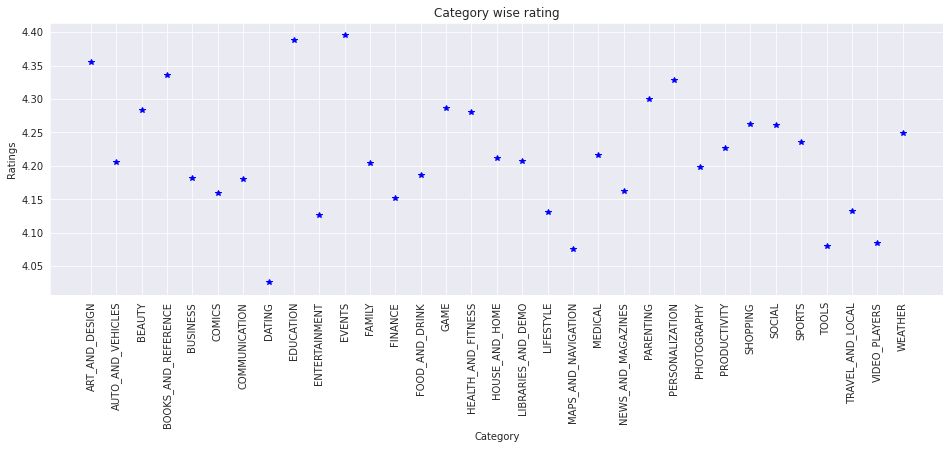

In [51]:
#Plotting the result
plt.figure(figsize=(16,5))
plt.plot(r,"r*",color="b")
plt.xticks(rotation=90)
plt.title("Category wise rating")
plt.xlabel("Category")
plt.ylabel("Ratings")
plt.show()

This shows that events category has received more rating.

## Which category has more reviews?

In [52]:
#Here we aggregate the review column by its mean value
Rev=grp["Reviews"].agg(np.mean)
print(Rev)

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [53]:
Rev.max()

2107137.622739018

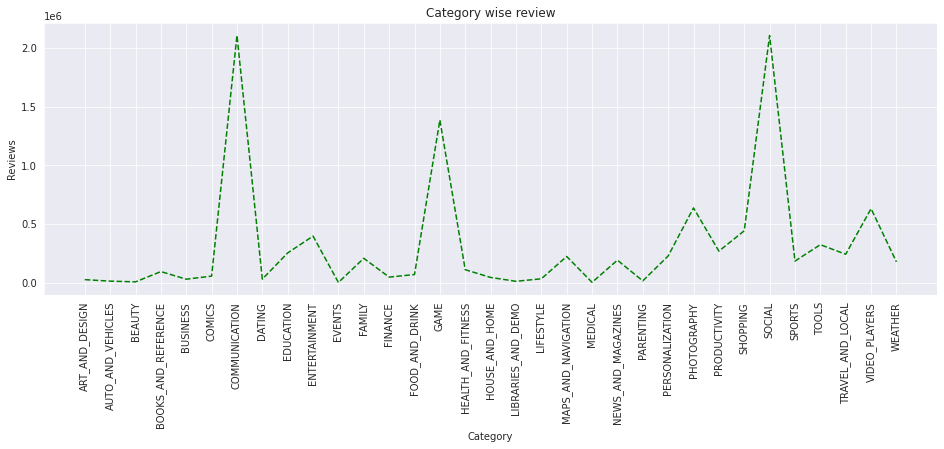

In [54]:
#Plotting the result
plt.figure(figsize=(16,5))
plt.plot(Rev,"r--",color="g")
plt.xticks(rotation=90)
plt.title("Category wise review")
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.show()

By this graph we can say that both communication and social apps have almost same number of reviews.

## What is the price of each category?Which category has highest price?

In [55]:
#Here we aggregate price column by its sum
p=grp["Price"].agg(np.sum)
print(p)

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

In [56]:
p.max()        #Highest price

2900.829999999998

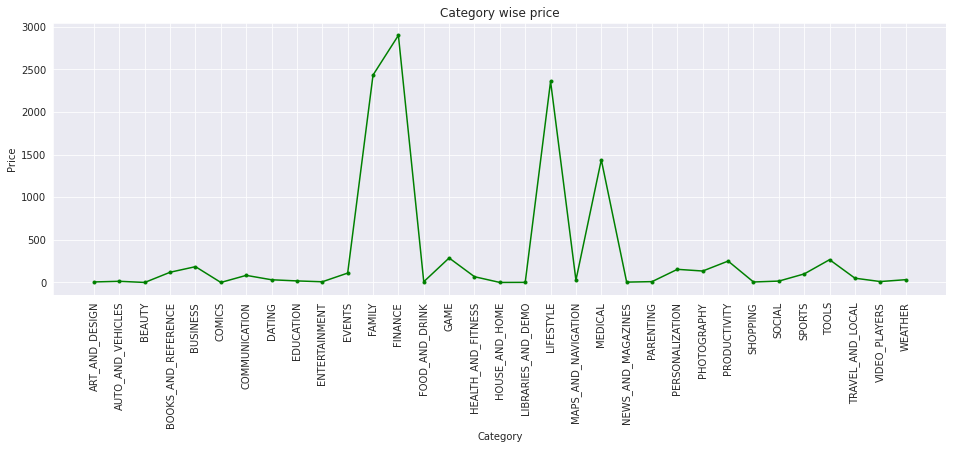

In [57]:
#Plotting the result
plt.figure(figsize=(16,5))
plt.plot(p,"g.-",color="g")
plt.xticks(rotation=90)
plt.title("Category wise price")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

The graph shows that Finance category has highest price of their apps.

In [58]:
import jovian

In [59]:
jovian.commit(files=["googleplaystore.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aashigupta118/google-playstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/aashigupta118/google-playstore-analysis


'https://jovian.ml/aashigupta118/google-playstore-analysis'

## Conclusion

By this analysis, we saw so many insights of the Google Apps. We came to know about differnt types of apps, their ratings, reviews, price and all the other information related to apps which we never saw before this project.  this type of projects are very useful to gain more information and to became more familar with them.
I select this dataset as it seems interesting to me and related to our needs as we install apps from Google Play Store.

In [60]:
import jovian

In [ ]:
jovian.commit(files=["googleplaystore.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
